# Prosper Loan Data Visual Analysis

## Investigation Overview

> The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations. I am most interested in figuring out the features which are benefecial for receiving loan from Prosper. 

## Dataset Overview

> This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), borrower income, borrower employment status and housing status, borrower credit history, and the latest payment information.

In [53]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [54]:
# load in the dataset into a pandas dataframe
prosperLoanData = pd.read_csv (r'prosperLoanData.csv', )
prosperLoanData.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### I will start by looking at the main variable of interest i.e. ProsperScore

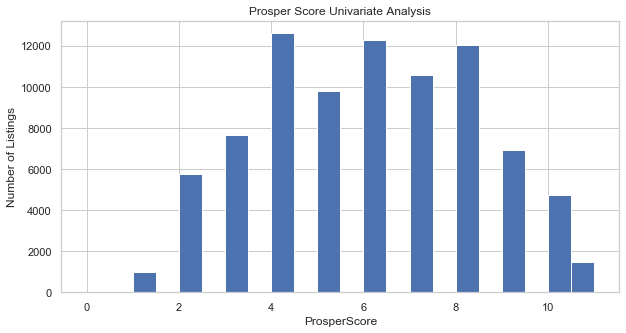

In [55]:
## standard-scaled plot
binsize = 0.5
bins = np.arange(0, prosperLoanData['ProsperScore'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = prosperLoanData, x = 'ProsperScore', bins = bins)
plt.title('Prosper Score Univariate Analysis')
plt.xlabel('ProsperScore')
plt.ylabel('Number of Listings')
plt.show();

### Identifying the relationship between AvailableBankcardCredit vs. BorrowerRate

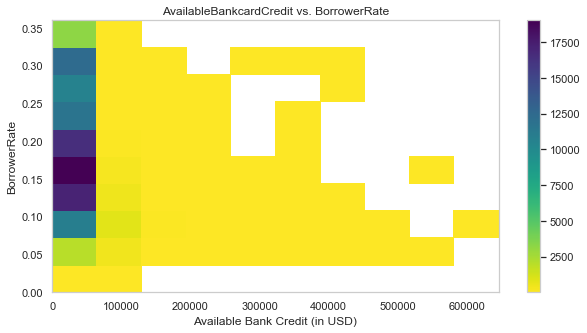

In [76]:
# remove the null entries
loan_data_sub = prosperLoanData.loc[prosperLoanData.AvailableBankcardCredit.notnull()]

# plots the hist2d graph 
plt.figure(figsize=[10, 5])
plt.hist2d(data=loan_data_sub, x='AvailableBankcardCredit', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5)
plt.colorbar()
plt.xlabel('Available Bank Credit (in USD)')
plt.ylabel('BorrowerRate')
plt.title('AvailableBankcardCredit vs. BorrowerRate');

The plot says the more the amount in their bank card, the less the loans they take and less the borrower rate in most cases.

### Prosper principal borrowed is higher with high income range customers.

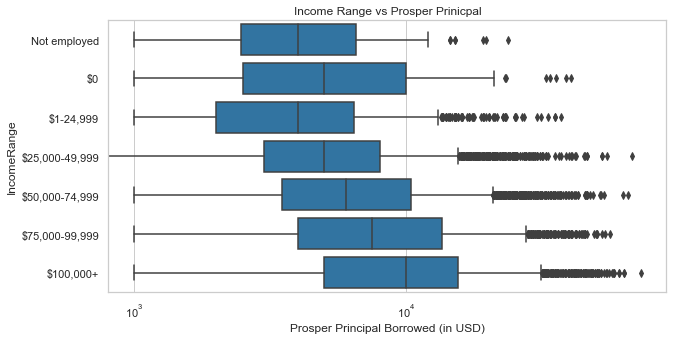

In [77]:
# orders the x axis 
order = ['Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']

# plots the boxplot
plt.figure(figsize=[10, 5])
sb.boxplot(data=prosperLoanData, y='IncomeRange', x='ProsperPrincipalBorrowed', 
           orient ="h", color= default_color, order=order);

# scale the x axis with log to analyze more accurately
plt.xscale('log')
plt.title('Income Range vs Prosper Prinicpal')
plt.yticks(rotation=0);
plt.xlabel('Prosper Principal Borrowed (in USD)');

### Prosper score is more of high income customers. 

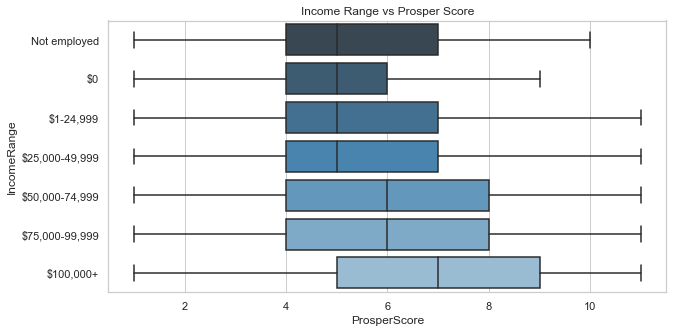

In [78]:
plt.figure(figsize=[10, 5])
sb.boxplot(data=prosperLoanData, x='ProsperScore', y='IncomeRange', palette=("Blues_d") , order=order);
plt.title('Income Range vs Prosper Score')
sb.set(style="whitegrid")
plt.xticks(rotation=0);
plt.ylabel('IncomeRange');

### BorrowerRate pattern over years

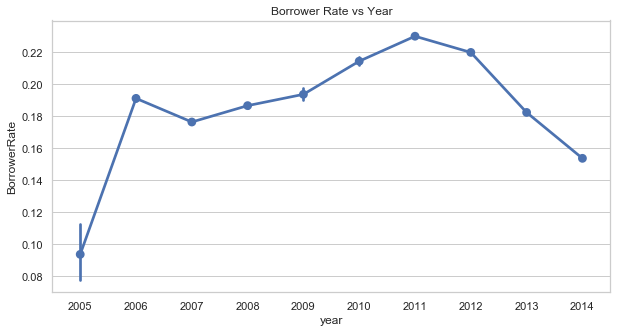

In [79]:
# Get the year from the creation date and create a column for it
prosperLoanData['year'] = prosperLoanData.ListingCreationDate.str.split('-').str[0]
year_data = prosperLoanData.year.value_counts()
# plots the pointplot for year vs BorrowerRate
plt.figure(figsize=[10, 5])
plt.title('Borrower Rate vs Year')
sb.pointplot(data=prosperLoanData, x='year', y='BorrowerRate');

A pattern has been deciphered which shows that the rate of interest increased from 2005-2006 and then fell off from 2006-2007 and then it constantly picked up for few years, reached its peak in 2011 which then started decreasing constantly.



### Analysing how the BorrowerRate changed over years for Homeowners vs Non-Homeowners

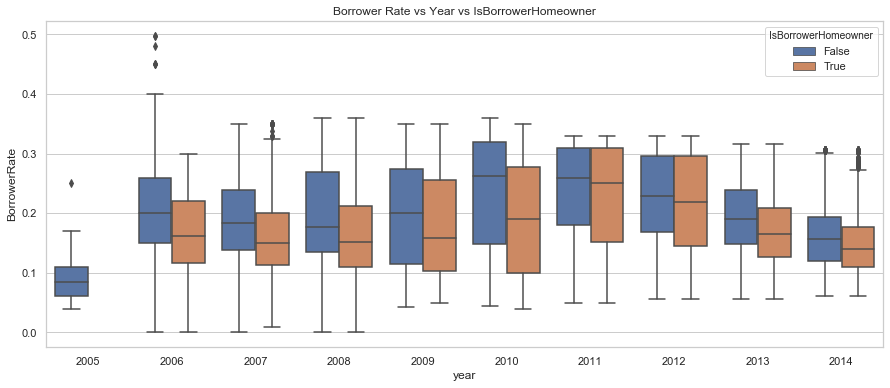

In [60]:
# plots the boxplot to analyze homeowner's and non-homeowner's rate over years

g = sb.boxplot(data=prosperLoanData, x='year', y='BorrowerRate', hue='IsBorrowerHomeowner');
plt.title('Borrower Rate vs Year vs IsBorrowerHomeowner')
g.figure.set_figwidth(15)
g.figure.set_figheight(6);

Borrower rate increased for some years in case of non homeowners, however it constantly decreased around 2010. As regards of homeowners, there wasn't much difference till 2009 but after 2009, the graph went up till 2011 and started falling off from then.

### Analysing BorrowerAPR vs ProsperScore on difference letter ratings

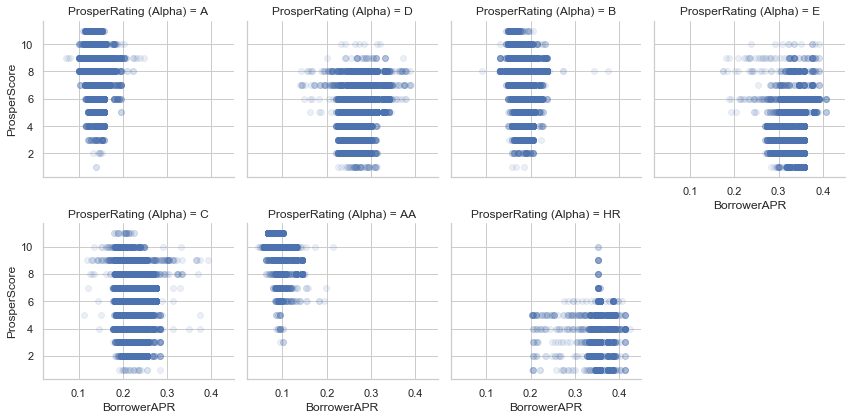

In [61]:
g = sb.FacetGrid(data = prosperLoanData, col = 'ProsperRating (Alpha)', col_wrap = 4, height = 3)
plt.setp(g.fig.texts, text="")
g.map(plt.scatter, 'BorrowerAPR', 'ProsperScore', alpha = 0.1)
g.set_xlabels('BorrowerAPR')
g.set_ylabels('ProsperScore')
plt.show()

The patterns shows the lowerest rating(HR) of borrowers have the highest APR. For high rating A(A), the borrowers has the lowers APR. This visualization differenate groups of people in terms of APR received based on their rating and scores.

### BorrowerAPR vs. CreditScoreRangeUpper & ProsperScore

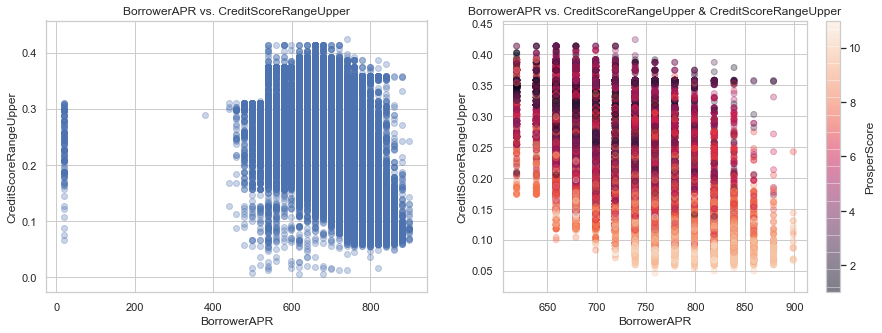

In [62]:
plt.figure(figsize = [15, 5]) 

plt.subplot(1, 2, 1)
plt.scatter(data = prosperLoanData, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', alpha = 0.3)
plt.title('BorrowerAPR vs. CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');


plt.subplot(1, 2, 2)
plt.scatter(data = prosperLoanData, x = 'CreditScoreRangeUpper', y = 'BorrowerAPR', c ='ProsperScore', alpha = 0.3)
plt.colorbar(label = 'ProsperScore')
plt.title('BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper')
plt.xlabel('BorrowerAPR')
plt.ylabel('CreditScoreRangeUpper');

From all above visualizations created from univariate exploration to multivariate exploration, many variable are found to be negatively correlated to BorrowerAPR, whereas ProspoerScore gives the strongest negative relationship.

### The effect of TotalCreditLinespast7years and IncomeRange for BorrowerRate and LoanOriginalAmount.

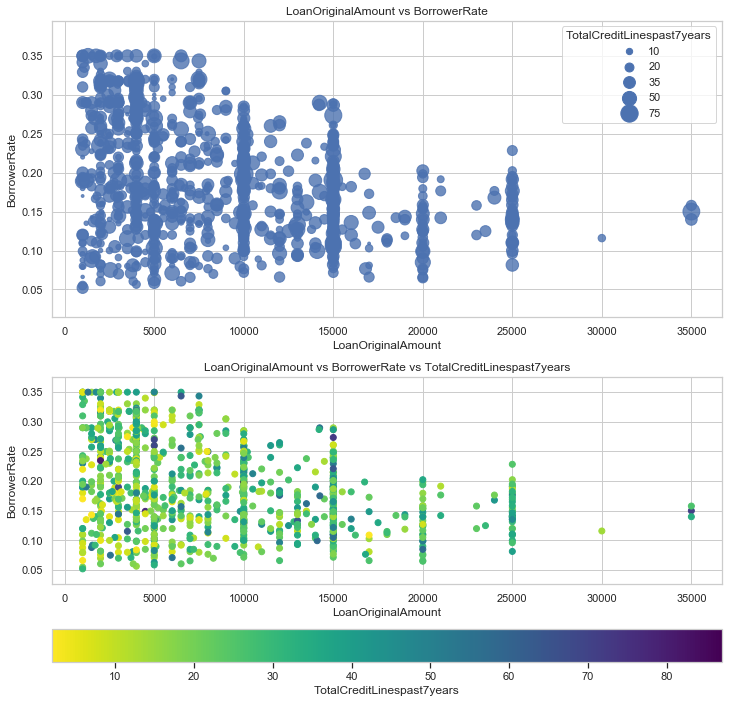

In [85]:
#np.random.seed(2018)
sample=np.random.choice(prosperLoanData.shape[0],1000, replace=False)
prosperLoanData_subset=prosperLoanData.loc[sample]

plt.figure(figsize = [12,12])
plt.subplot(2,1,1)
ax1=sb.regplot(data=prosperLoanData_subset,x="LoanOriginalAmount",y="BorrowerRate",
          x_jitter=0.04, fit_reg=False,
          scatter_kws={'s':prosperLoanData_subset["TotalCreditLinespast7years"]*4})
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate")
plt.title('LoanOriginalAmount vs BorrowerRate')
sizes=[10, 20, 35,50, 75]
base_color=sb.color_palette()[0]
legend_obj=[]
for s in sizes:
    legend_obj.append(plt.scatter([],[],s=s*4,color=base_color))
plt.legend(legend_obj,sizes,title="TotalCreditLinespast7years");

plt.subplot(2,1,2)
ax2=plt.scatter(data=prosperLoanData_subset,x="LoanOriginalAmount",y="BorrowerRate",
            c="TotalCreditLinespast7years", cmap="viridis_r")
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate")
plt.colorbar(label="TotalCreditLinespast7years",orientation="horizontal");
plt.title('LoanOriginalAmount vs BorrowerRate vs TotalCreditLinespast7years')
plt.show();

I tried using both size and color to find the effect of TotalCreditLinespast7years in a scatter plot of BorrowerRate vs. LoanOriginalAmount. As it is shown, TotalCreditLinespast7years does not play a significant role on controling the BorrowerRate and LoanOriginalAmount relationship.

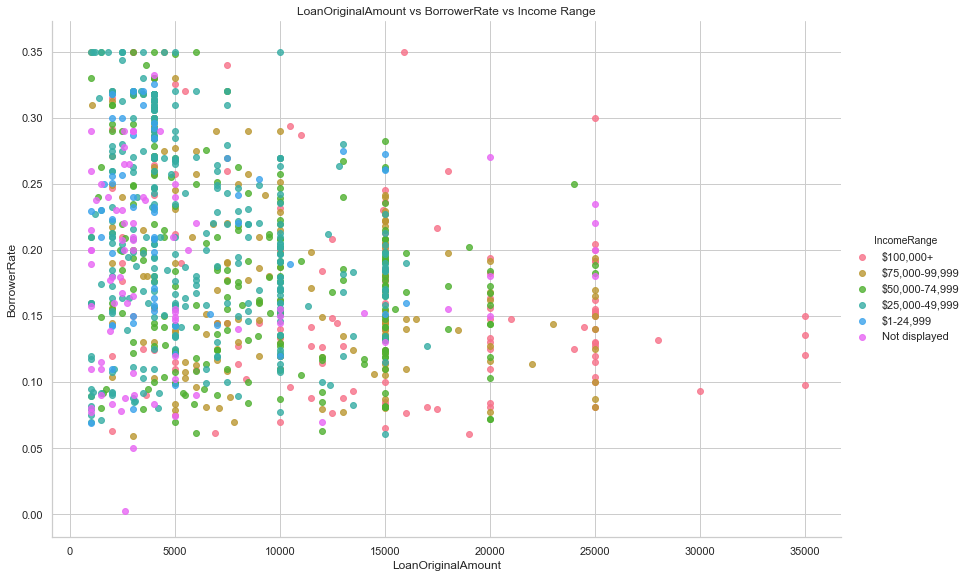

In [86]:
#np.random.seed(18)
sample=np.random.choice(prosperLoanData.shape[0],1000, replace=False)
prosperLoanData_subset=prosperLoanData.loc[sample]
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
g=sb.FacetGrid(data=prosperLoanData_subset,hue="IncomeRange",hue_order=IncomeRange_order,
               height=8, aspect=1.5,palette="husl")
g=g.map(sb.regplot,"LoanOriginalAmount","BorrowerRate",x_jitter=0.5,fit_reg=False);
g.add_legend()
plt.xlabel("LoanOriginalAmount")
plt.ylabel("BorrowerRate");
plt.title('LoanOriginalAmount vs BorrowerRate vs Income Range')
plt.show();

I used color to investigate the effect of IncomeRange on the relationship between BorrowerRate and LoanOriginalAmount. It seems by increasing the LoanOriginalAmount BorrowerRate decreases. Besides, apparently only those who has a IncomeRange above 100k, are borrowing higher LoanOriginalAmount (>25K) and their BorrowerRate is <0.15. Note that, there are other examples which are not following the same trend. For example, you may find, people with a IncomeRange above 100k who has lower LoanOriginalAmount and higher BorrowerRate.

### Effect of IncomeRange on ProsperScore and BorrowerRate relationship.

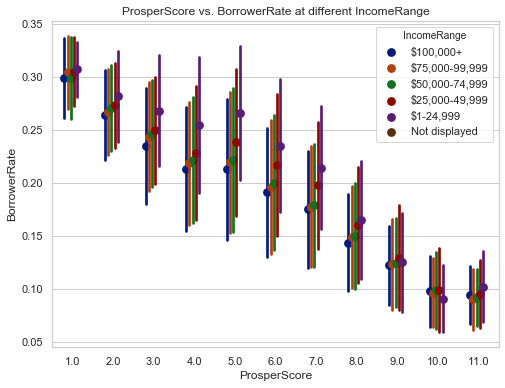

In [65]:
fig = plt.figure(figsize = [8,6])
IncomeRange_order=[ "$100,000+","$75,000-99,999","$50,000-74,999","$25,000-49,999","$1-24,999","Not displayed" ] 
ax = sb.pointplot(data = prosperLoanData, x = 'ProsperScore', y = 'BorrowerRate', hue = 'IncomeRange',
                  hue_order=IncomeRange_order, palette = 'dark', linestyles = '', dodge = 0.4, ci="sd")# 
plt.title('ProsperScore vs. BorrowerRate at different IncomeRange')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerRate')
plt.show();

In general, increasing ProsperScore decreases BorrowerRate. Apparently, people with lower IncomeRange have higher BorrowerRate at each individual ProsperScore.

In [87]:
!jupyter nbconvert slides.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slides.ipynb to slides
[NbConvertApp] Writing 1159658 bytes to slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/slides.slides.html
Use Control-C to stop this server
^C

Interrupted
